**Staement: Having a porch increases home sale price**

**H<sub>0</sub> =Home sale price will decrease of reamin the same if it has a porch.**

**H<sub>A</sub>= Home sale price will increase if the propery has a porch.**

In [9]:
import pandas as pd
import matplotlib as plt
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 0)
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2
%matplotlib inline

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

# Import neccesary data sets

mean/medain of porch house vesisu house

In [10]:
sales_2019=pd.read_csv('../../data/EXTR_RPSale_2019.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
PINS=pd.read_csv('../../data/PINS.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
bldinfo_2019 = pd.read_csv('../../data/EXTR_ResBldg_2019.csv', dtype={'Major': 'str', 'Minor':'str', 'ZipCode': 'str','PIN':'string'})

In [11]:
sales_0=sales_2019[sales_2019["SalePrice"]==0]
sales_0.SaleInstrument.value_counts()

15    10410
3     1882 
26    343  
24    267  
2     232  
27    100  
4     93   
22    42   
18    35   
21    9    
19    8    
20    2    
23    1    
1     1    
Name: SaleInstrument, dtype: int64

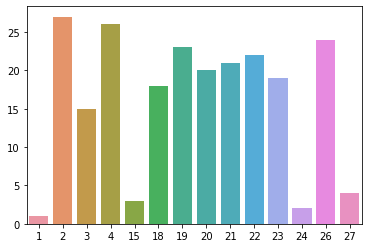

In [12]:
zero_df = sales_2019.loc[sales_2019['SalePrice']==0]
x = zero_df['SaleInstrument'].unique()
y = zero_df['SaleInstrument'].value_counts()
barplot = sns.barplot(x=x,y=y.index)

In [13]:
total=len(sales_0)

In [14]:
1   /total*100

0.0074487895716946004

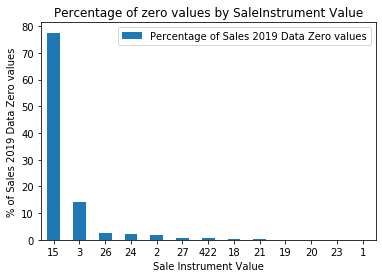

In [15]:
vis_data=pd.DataFrame({'Sale Instrument Value':['15', '3','26','24','2','27','4''22','18','21','19','20','23','1'] ,'Percentage of Sales 2019 Data Zero values':[77.54189944134077426187, 14.018621973929237, 2.5549348230912474, 1.9888268156424582, 1.728119180633147, 0.74487895716946,0.6927374301675978, 0.3128491620111732, 
                                                                                                                                                 0.260707635009311 ,0.0670391061452514,0.059590316573556804,0.014897579143389201,0.0074487895716946004]})

ax = vis_data.plot.bar(x='Sale Instrument Value', y='Percentage of Sales 2019 Data Zero values', rot=0, title='Percentage of zero values by SaleInstrument Value')
ax.set_ylabel('% of Sales 2019 Data Zero values');


In [16]:
sale_15=sales_0[sales_0["SaleInstrument"]==15]
sale_15

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
6,1021335,2980649,797320,2320,2019-03-28,0,,,,,,,,CARDONA ROMINA GUZMAN,MARTINEZ JAVIER JIMENEZ,3,6,15,N,N,N,N,10,8,18 31 51,7973202320
7,600,3013394,663990,0178,2019-10-02,0,20191002000875,,,,,,,HAN CHAO+GAO YUE,GAO YUE,3,6,15,N,N,N,N,19,8,18 31 51 52,6639900178
11,716,3028464,640331,0010,2019-12-31,0,20200102000331,,,,,,,WARNER NANCY L,WARNER NANCY L+WARNER CREDIT SHELTER TRUST TODD GR,11,6,15,N,N,N,N,1,8,,6403310010
12,363667,3007081,640331,0010,2019-08-20,0,20190827000878,,,,,,,WARNER NICHOLAS,WARNER NICHOLAS,11,6,15,N,N,N,N,1,8,,6403310010
13,725,3004740,040510,0150,2019-07-12,0,20190814000349,,,,,,,GILLESPIE CAROL A+RICHARD W,GILLESPIE CAROL A+RICHARD W+ET AL,11,6,15,N,N,N,N,1,8,,0405100150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42653,2086580,3014179,810860,0240,2019-09-30,0,20191007001830,,,,,,,SEGALE MARK A+KERI D,SEGALE MARK A+KERI D-FLT+TTEES,3,6,15,N,N,N,N,5,8,12 18 31,8108600240
42665,2087132,3010345,636290,0116,2019-09-13,0,20190916000748,,,,,,,SHEPARD DAVID J,SHEPARD DAVID J+SHEPARD LIVING TRUST,11,6,15,N,N,N,N,1,8,18,6362900116
42666,2087143,3007943,242303,9158,2019-07-20,0,20190830001205,,,,,,,MCKITTRICK LANYA L,MCKITTRICK TODD M+LANYA L,3,6,15,N,N,N,N,13,8,18 31 51,2423039158
42667,2087558,3011447,004200,0010,2019-09-23,0,20190923001098,,,,,,,SWAFFORD VICKIE+RICHARD,KOCH-JOHNSON ALICIA,11,6,15,N,N,N,N,1,8,,0042000010


In [17]:
actual_sales=sales_2019[(sales_2019["SaleReason"]==1)|(sales_2019["SaleReason"]==18)]
actual_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Now one more filter to only display residential sale

In [18]:
res_sales=actual_sales[(actual_sales["PropertyClass"]==7)|(actual_sales["PropertyClass"]==8)]
res_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Lastly, we need to filter out the zeros in the Sales column. This is because of how it will heavily screw the data. 

In [19]:
finalsales=res_sales[res_sales["SalePrice"]!=0]
finalsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Next we will filter out our outlier based on Z scores. 

In [20]:
z_score=np.abs(stats.zscore(finalsales["SalePrice"]))
siftedsales=finalsales[z_score <3]
siftedsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Now we have our sifted out sales data we now need to create our porch data

In [32]:
has_porch= bldinfo_2019[(bldinfo_2019["SqFtOpenPorch"]!=0)|(bldinfo_2019["SqFtEnclosedPorch"]!=0)]
has_porch

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN
0,16,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,ST,,98003,1.0,7,0,1480,0,0,0,0,0,1480,0,0,0,0,440,,80,0,120,5,2,0,,3,0,0,2,1,0,0,0,1994,0,0,0,0,5,0,0100500380
4,38,018880,0210,1,1,3410 SE 18TH ST,3410,,SE,18TH,ST,,NaN,2.0,9,0,1602,0,1991,0,0,0,3593,0,0,0,0,520,N,204,0,0,5,2,0,N,4,1,0,4,1,0,0,1,2019,0,49,0,0,3,0,0188800210
5,41,019110,0145,1,1,4512 90TH AVE SE 98040,4512,,,90TH,AVE,SE,98040,1.0,8,0,2290,0,0,0,0,0,2290,0,0,0,0,0,,250,0,0,6,2,95,,3,1,1,1,1,0,0,0,1950,0,0,0,0,4,0,0191100145
7,54,017900,1770,1,1,12207 50TH AVE S 98168,12207,,,50TH,AVE,S,98168,1.0,8,0,1350,0,0,0,0,0,2230,1280,880,7,400,80,Y,40,0,100,5,3,0,,3,0,0,2,1,0,0,0,2015,0,0,0,0,3,0,0179001770
9,82,017900,2305,1,1,12517 51ST PL S,12517,,,51ST,PL,S,NaN,1.0,8,0,2190,0,0,0,0,0,2190,0,0,0,0,760,N,140,0,0,5,2,0,N,4,1,0,2,0,0,0,0,2015,0,0,0,0,3,0,0179002305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37930,514925,430735,1100,1,1,3103 SE 4TH ST 98056,3103,,SE,4TH,ST,,98056,2.0,7,0,1630,0,2250,0,0,0,3880,0,0,0,0,610,N,340,0,0,5,2,0,N,5,0,0,3,1,0,0,0,2004,0,0,0,0,3,3500,4307351100
37931,514934,431070,0295,1,1,9721 WALLINGFORD AVE N 98103,9721,,,WALLINGFORD,AVE,N,98103,1.0,7,0,890,0,0,0,0,0,990,890,100,6,240,0,N,40,0,0,5,1,0,N,3,0,0,1,0,0,1,0,1908,0,0,0,0,3,0,4310700295
37942,515014,873218,0020,1,1,32602 47TH AVE SW 98023,32602,,,47TH,AVE,SW,98023,1.0,8,0,1290,0,0,0,0,0,1910,620,620,8,0,0,Y,70,0,100,5,2,0,N,3,1,1,1,0,0,0,0,1985,0,0,0,0,4,0,8732180020
37944,515045,880590,0420,1,1,2026 E LOUISA ST 98112,2026,,E,LOUISA,ST,,98112,1.5,8,0,1090,800,0,0,0,0,2390,1090,500,6,180,0,N,40,0,350,5,2,0,N,4,0,0,2,0,1,0,0,1927,0,0,0,0,3,0,8805900420


In [33]:
has_porch["porch"]=(has_porch["SqFtOpenPorch"]+ has_porch["SqFtEnclosedPorch"])

<ipython-input-33-d5a44313ee20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_porch["porch"]=(has_porch["SqFtOpenPorch"]+ has_porch["SqFtEnclosedPorch"])


In [34]:
has_porch["SqFtEnclosedPorch"].sum()

222138

In [31]:
has_porch["SqFtOpenPorch"].sum()

2919571

In [24]:
no_porch= bldinfo_2019[(bldinfo_2019["SqFtOpenPorch"]==0)|(bldinfo_2019["SqFtEnclosedPorch"]==0)]
no_porch.rename(columns={"SalePrice": "saleprice_no_porch"})

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN
0,16,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,ST,,98003,1.0,7,0,1480,0,0,0,0,0,1480,0,0,0,0,440,,80,0,120,5,2,0,,3,0,0,2,1,0,0,0,1994,0,0,0,0,5,0,0100500380
1,27,017900,0315,1,1,12254 43RD AVE S 98178,12254,,,43RD,AVE,S,98178,1.0,5,0,550,0,0,0,0,0,550,0,0,0,0,0,,0,0,0,1,1,0,,2,0,1,0,0,0,0,0,1942,0,0,0,0,3,0,0179000315
2,31,017900,1290,1,1,12231 48TH AVE S 98178,12231,,,48TH,AVE,S,98178,2.0,7,0,660,0,920,0,0,0,1580,0,0,0,0,420,,0,0,0,5,2,0,,3,1,0,2,0,0,0,0,2002,0,0,0,0,3,0,0179001290
3,37,018800,0095,1,1,1602 LAKEVIEW BLVD E 98102,1602,,,LAKEVIEW,BLVD,E,98102,2.0,9,0,660,0,595,0,0,0,1540,380,285,8,0,0,Y,0,0,155,1,3,0,Y,3,1,1,1,0,1,0,0,1984,0,0,0,0,3,0,0188000095
4,38,018880,0210,1,1,3410 SE 18TH ST,3410,,SE,18TH,ST,,NaN,2.0,9,0,1602,0,1991,0,0,0,3593,0,0,0,0,520,N,204,0,0,5,2,0,N,4,1,0,4,1,0,0,1,2019,0,49,0,0,3,0,0188800210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37949,515104,195970,1472,1,1,2857 FRANKLIN AVE E,2857,,,FRANKLIN,AVE,E,NaN,2.0,9,0,490,0,510,0,0,0,1510,510,510,9,0,0,N,0,0,0,7,2,0,N,2,0,1,1,0,0,0,0,2016,0,0,0,0,3,0,1959701472
37950,515122,197220,0269,1,1,3616 PALATINE AVE N,3616,,,PALATINE,AVE,N,NaN,2.0,8,0,440,0,440,0,0,0,1270,390,390,8,0,0,Y,0,0,370,7,3,0,,3,1,2,0,1,0,0,0,2017,0,0,0,0,3,5000,1972200269
37951,515138,197220,1902,1,1,3816 WINSLOW PL N 98103,3816,,,WINSLOW,PL,N,98103,3.0,8,0,150,0,450,430,0,0,1030,0,0,0,0,240,,0,0,0,5,2,0,,2,1,0,1,1,0,0,0,2003,0,0,0,0,3,0,1972201902
37952,515144,197220,5172,1,1,11 B W DRAVUS ST,11,B,W,DRAVUS,ST,,NaN,3.0,8,0,220,0,510,380,0,0,1600,490,490,8,0,290,,0,0,0,5,2,0,,3,1,0,2,0,0,0,0,2007,0,0,0,0,3,0,1972205172


# Merge our residential porches data with our now sifted sales data on the unique identifiers known as a PIN.

In [25]:
sales_and_porch=siftedsales.merge(has_porch, how="inner", on="PIN")
sales_and_porch.rename(columns={"SalePrice": "saleprice_porch"},inplace=True)

In [26]:
sales_and_noporch=siftedsales.merge(no_porch, how="inner", on="PIN")
sales_and_noporch.rename(columns={"SalePrice": "saleprice_noporch"}, inplace=True)

In [27]:
875205.461228-782780.426187

92425.035041

In [28]:
vis_data=pd.DataFrame({'House Clasification':['No Porch', 'Porch'], 'Mean Sale Price in USD':[782780.426187, 875205.461228]})
# vis_data= vis_data.transpose()
# vis_data.mean()
vis_data

,House Clasification,Mean Sale Price in USD
0,No Porch,782780.426187
1,Porch,875205.461228


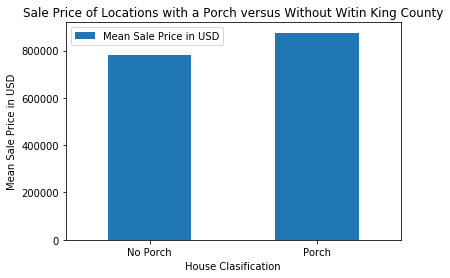

In [29]:
ax = vis_data.plot.bar(x='House Clasification', y='Mean Sale Price in USD', rot=0, title='Sale Price of Locations with a Porch versus Without Witin King County')
ax.set_ylabel('Mean Sale Price in USD');
